# ECE C247 - Neural Networks & Deep Learning, EEG Project
## Alexie Pogue, Amir Omidfar, Eric Peltola, Kenny Chen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Parameters

In [0]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Data Setup

## Load Data

In [4]:
data_path = "/content/drive/Shared drives/ECE C247 Project/data/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[9], verbose=True)

Training/Valid data shape: (231, 22, 1000)
Test data shape: (47, 22, 1000)


## Preprocessing

In [0]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Dataloaders

In [0]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.39145
	Train loss: 0.04511, Accuracy: 48/184 (26.09%)
	Validation loss: 0.03128, Accuracy: 10/47 (21.28%)
	Test loss: 0.02977, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.39087
	Train loss: 0.04491, Accuracy: 50/184 (27.17%)
	Validation loss: 0.03275, Accuracy: 10/47 (21.28%)
	Test loss: 0.02994, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.40381
	Train loss: 0.04450, Accuracy: 58/184 (31.52%)
	Validation loss: 0.03302, Accuracy: 8/47 (17.02%)
	Test loss: 0.02999, Accuracy: 18/47 (38.30%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.33840
	Train loss: 0.04448, Accuracy: 55/184 (29.89%)
	Validation loss: 0.03371, Accuracy: 7/47 (14.89%)
	Test loss: 0.03025, Accuracy: 16/47 (34.04%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.36813
	Train loss: 0.04485, Accuracy: 55/184 (29.89%)
	Validation loss: 0.03440, Accuracy: 10/47 (21.28%)
	Test loss: 0.03064

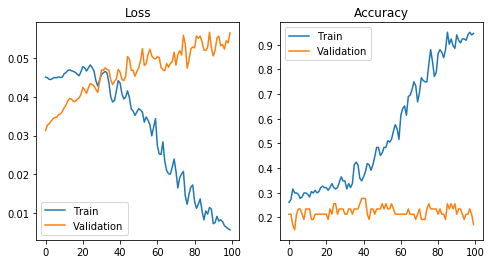

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.38830
	Train loss: 0.04556, Accuracy: 48/184 (26.09%)
	Validation loss: 0.02908, Accuracy: 10/47 (21.28%)
	Test loss: 0.02987, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.37362
	Train loss: 0.04598, Accuracy: 48/184 (26.09%)
	Validation loss: 0.02895, Accuracy: 10/47 (21.28%)
	Test loss: 0.03029, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.35724
	Train loss: 0.04566, Accuracy: 52/184 (28.26%)
	Validation loss: 0.02899, Accuracy: 12/47 (25.53%)
	Test loss: 0.03027, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.33279
	Train loss: 0.04493, Accuracy: 49/184 (26.63%)
	Validation loss: 0.02926, Accuracy: 12/47 (25.53%)
	Test loss: 0.03027, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.29850
	Train loss: 0.04337, Accuracy: 64/184 (34.78%)
	Validation loss: 0.02971, Accuracy: 10/47 (21.28%)
	Test loss: 0.029

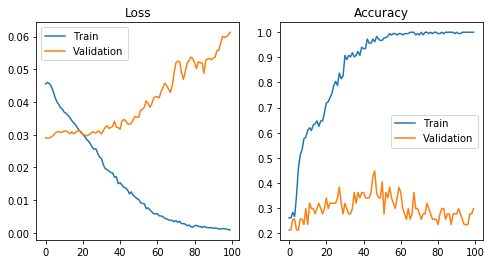

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## GRU

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.37152
	Train loss: 0.04569, Accuracy: 39/184 (21.20%)
	Validation loss: 0.02872, Accuracy: 20/47 (42.55%)
	Test loss: 0.02961, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.34335
	Train loss: 0.04531, Accuracy: 39/184 (21.20%)
	Validation loss: 0.02890, Accuracy: 20/47 (42.55%)
	Test loss: 0.02957, Accuracy: 11/47 (23.40%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.37794
	Train loss: 0.04450, Accuracy: 57/184 (30.98%)
	Validation loss: 0.02894, Accuracy: 20/47 (42.55%)
	Test loss: 0.02947, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.29401
	Train loss: 0.04325, Accuracy: 78/184 (42.39%)
	Validation loss: 0.02915, Accuracy: 17/47 (36.17%)
	Test loss: 0.02939, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.40289
	Train loss: 0.04255, Accuracy: 82/184 (44.57%)
	Validation loss: 0.02940, Accuracy: 17/47 (36.17%)
	Test loss: 0.029

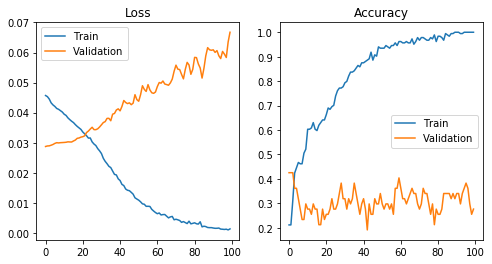

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## CNN + LSTM

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.39200
	Train loss: 0.04537, Accuracy: 39/184 (21.20%)
	Validation loss: 0.02926, Accuracy: 20/47 (42.55%)
	Test loss: 0.02944, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.38739
	Train loss: 0.04529, Accuracy: 39/184 (21.20%)
	Validation loss: 0.02936, Accuracy: 20/47 (42.55%)
	Test loss: 0.02944, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.38660
	Train loss: 0.04518, Accuracy: 49/184 (26.63%)
	Validation loss: 0.02943, Accuracy: 7/47 (14.89%)
	Test loss: 0.02943, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.38580
	Train loss: 0.04496, Accuracy: 49/184 (26.63%)
	Validation loss: 0.02942, Accuracy: 7/47 (14.89%)
	Test loss: 0.02937, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.38102
	Train loss: 0.04448, Accuracy: 77/184 (41.85%)
	Validation loss: 0.02925, Accuracy: 13/47 (27.66%)
	Test loss: 0.02918

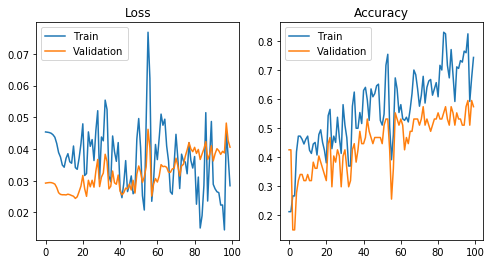

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

## CNN + GRU

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.37820
	Train loss: 0.04527, Accuracy: 39/184 (21.20%)
	Validation loss: 0.02927, Accuracy: 20/47 (42.55%)
	Test loss: 0.02952, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.38062
	Train loss: 0.04494, Accuracy: 79/184 (42.93%)
	Validation loss: 0.02943, Accuracy: 15/47 (31.91%)
	Test loss: 0.02939, Accuracy: 19/47 (40.43%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.37838
	Train loss: 0.04390, Accuracy: 84/184 (45.65%)
	Validation loss: 0.02926, Accuracy: 14/47 (29.79%)
	Test loss: 0.02890, Accuracy: 17/47 (36.17%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.33405
	Train loss: 0.04126, Accuracy: 89/184 (48.37%)
	Validation loss: 0.02847, Accuracy: 15/47 (31.91%)
	Test loss: 0.02769, Accuracy: 18/47 (38.30%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.26135
	Train loss: 0.03812, Accuracy: 88/184 (47.83%)
	Validation loss: 0.02787, Accuracy: 15/47 (31.91%)
	Test loss: 0.026

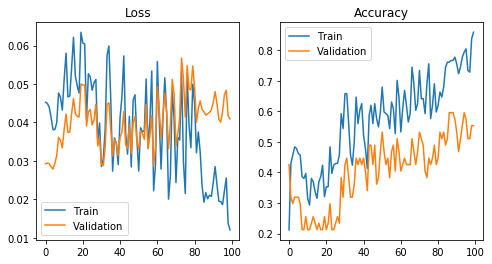

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)